In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
connect_4 = fetch_ucirepo(id=26) 
  
# data (as pandas dataframes) 
X = connect_4.data.features 
y = connect_4.data.targets 
  
# metadata 
print(connect_4.metadata) 
  
# variable information 
print(connect_4.variables) 

{'uci_id': 26, 'name': 'Connect-4', 'repository_url': 'https://archive.ics.uci.edu/dataset/26/connect+4', 'data_url': 'https://archive.ics.uci.edu/static/public/26/data.csv', 'abstract': 'Contains connect-4 positions', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Spatial'], 'num_instances': 67557, 'num_features': 42, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1995, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C59P43', 'creators': ['John Tromp'], 'intro_paper': None, 'additional_info': {'summary': 'This database contains all legal 8-ply positions in the game of connect-4 in which neither player has won yet, and in which the next move is not forced.\r\n\r\nx is the first player; o the second.\r\n\r\nThe outcome class is the game theoretical value for the first player.', 'purpose': None, 'funded_b

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [3]:
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
print(df.head())

# Drop rows with non-numeric values
df_numeric = df.dropna().select_dtypes(include=[np.number])

# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(df_numeric) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df_numeric.loc[subsample_indices]
    
    # Ensure the subsample is not empty
    if subsample.empty:
        print(f'Subsample {i+1} is empty. Skipping.')
        continue
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    
    # Ensure the correlation matrix is not empty
    if correlation_matrix.empty or correlation_matrix.isnull().all().all():
        print(f'Correlation matrix for subsample {i+1} is empty or all NaNs. Skipping.')
        continue
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

  a1 a2 a3 a4 a5 a6 b1 b2 b3 b4  ... f4 f5 f6 g1 g2 g3 g4 g5 g6 class
0  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
1  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
2  b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
3  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win
4  o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   win

[5 rows x 43 columns]
Subsample 1 is empty. Skipping.
Subsample 2 is empty. Skipping.
Subsample 3 is empty. Skipping.
Subsample 4 is empty. Skipping.
Subsample 5 is empty. Skipping.
Subsample 6 is empty. Skipping.
Subsample 7 is empty. Skipping.
Subsample 8 is empty. Skipping.
Subsample 9 is empty. Skipping.
Subsample 10 is empty. Skipping.


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced***

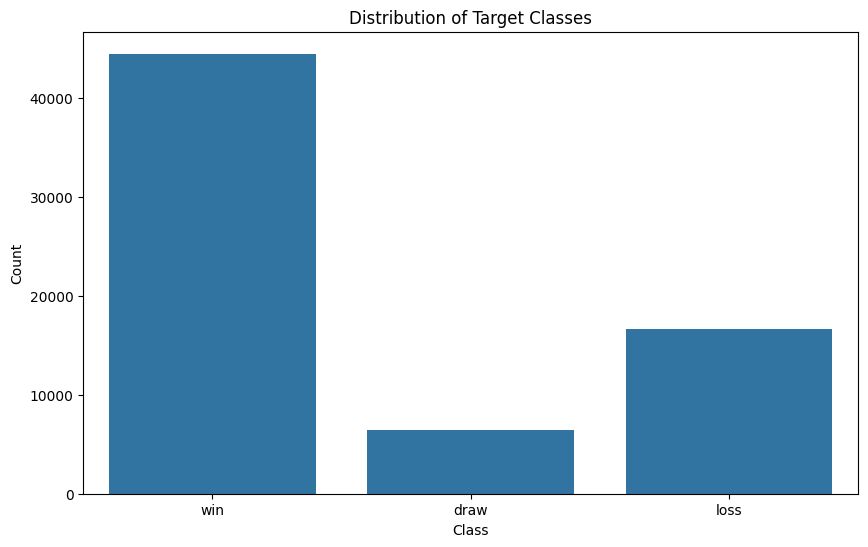

In [4]:
# Ensure the target variable is a pandas Series and categorical
y_series = pd.Series(y.squeeze(), name='target')

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=y_series)
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

In [5]:
# Create a list to store pair plots
pair_plots = []

# Randomly select subsamples and create pair plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df_numeric.loc[subsample_indices]
    
    # Ensure the subsample is not empty
    if subsample.empty:
        print(f'Subsample {i+1} is empty. Skipping.')
        continue
    
    # Check if the target variable is available
    if y.columns[0] not in subsample.columns:
        print(f'Subsample {i+1} does not contain the target variable. Skipping.')
        continue
    
    # Create pair plot for the subsample
    plt.figure(figsize=(12, 8))
    sns.pairplot(subsample, hue=y.columns[0])
    plt.title(f'Pair Plot - Subsample {i+1}')
    plt.show()

Subsample 1 is empty. Skipping.
Subsample 2 is empty. Skipping.
Subsample 3 is empty. Skipping.
Subsample 4 is empty. Skipping.
Subsample 5 is empty. Skipping.
Subsample 6 is empty. Skipping.
Subsample 7 is empty. Skipping.
Subsample 8 is empty. Skipping.
Subsample 9 is empty. Skipping.
Subsample 10 is empty. Skipping.


**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

In [6]:
# Create a list to store clustermaps
clustermaps = []

# Randomly select subsamples and create clustermaps
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df_numeric.loc[subsample_indices]
    
    # Ensure the subsample is not empty
    if subsample.empty:
        print(f'Subsample {i+1} is empty. Skipping.')
        continue
    
    # Check if the correlation matrix is empty
    correlation_matrix = subsample.corr()
    if correlation_matrix.empty or correlation_matrix.isnull().all().all():
        print(f'Correlation matrix for subsample {i+1} is empty or all NaNs. Skipping.')
        continue
    
    # Create clustermap for the subsample
    plt.figure(figsize=(12, 10))
    sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(f'Clustermap - Subsample {i+1}')
    plt.show()



Subsample 1 is empty. Skipping.
Subsample 2 is empty. Skipping.
Subsample 3 is empty. Skipping.
Subsample 4 is empty. Skipping.
Subsample 5 is empty. Skipping.
Subsample 6 is empty. Skipping.
Subsample 7 is empty. Skipping.
Subsample 8 is empty. Skipping.
Subsample 9 is empty. Skipping.
Subsample 10 is empty. Skipping.


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [ ]:


# Ensure that X_numeric and y_numeric are properly formatted
X_numeric = df_numeric
y_numeric = y.loc[df_numeric.index].squeeze().astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_numeric, test_size=0.2, random_state=42)

# Check the shape and unique values of y_train
print("Shape of y_train:", y_train.shape)
print("Unique values of y_train:", np.unique(y_train))
# Check the shape and content of X_train
print("Shape of X_train:", X_train.shape)
print("Sample of X_train:", X_train.head())

# Check if X_train contains meaningful features
if X_train.shape[1] == 0:
    print("X_train does not contain meaningful features. SVM model cannot be trained.")
else:
    # Train an initial SVM model
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Evaluate the initial model's performance
    y_pred = svm_model.predict(X_test)

# Check that the training data does not contain NaNs or non-numeric values
assert not X_train.isnull().values.any(), "Training features contain NaNs"
assert not X_test.isnull().values.any(), "Test features contain NaNs"
assert not y_train.isnull().values.any(), "Training labels contain NaNs"
assert not y_test.isnull().values.any(), "Test labels contain NaNs"

# Train an initial SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the initial model's performance
y_pred = svm_model.predict(X_test)
print("Initial SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Print the best parameters and estimator
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

# Evaluate the optimized model's performance
grid_predictions = grid.predict(X_test)
print("Optimized SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, grid_predictions)}")
print(classification_report(y_test, grid_predictions))